**Structure des bandes électroniques de LiMgP**

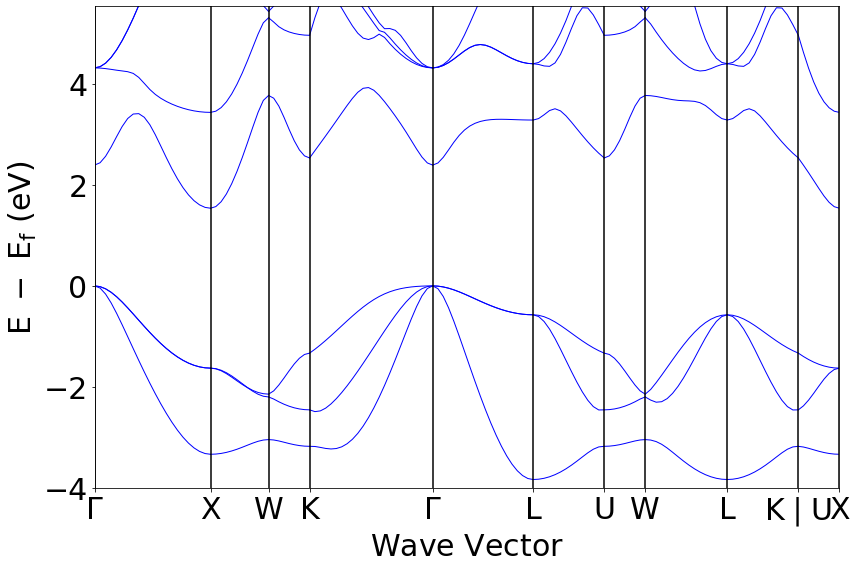

In [134]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice as lattice, Structure
from pymatgen.electronic_structure.core import Spin
from pprint import pprint
from IPython.display import Markdown, display
from pymatgen.electronic_structure import plotter
from matplotlib import pyplot as plt
import numpy as np

def printmd(string):
    display(Markdown(string))

    
#Obtention de la structure et de la structure de bande du matériau
with MPRester("Niub9m7cC3zFHMd6") as m:
    structure = m.get_structure_by_material_id("mp-36111")
    bandstructure = m.get_bandstructure_by_material_id("mp-36111")

    w = CifWriter(structure)
    w.write_file('mystructure.cif')
    
    #Télécharger la structure de la bande 
    
    bandsplot = BSPlotter(bands)
    printmd('**Structure des bandes électroniques de LiMgP**')
    a = plotter.BSPlotter(bandstructure)
    b = a.bs_plot_data()
    a.get_plot()
    
    distances = b.get('distances') #chaque tableau correspond aux abscisses d'une branche
    Energies = b.get('energy') #chaque tableau correspond aux ordonnées des différentes bandes pour chaque branche
    



**Bande interdite**

{'direct': False, 'energy': 1.5391000000000004, 'transition': '\\Gamma-X'}
1.5391000000000004
On observe que la bande interdite est indirecte, et possede une energie de 1.5391 eV.Le maximum de la bande de valence apparaît pour un vecteur d onde d indice Gamma et le minimum de la bande de conduction apparaît pour un vecteur d onde d indice X.


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

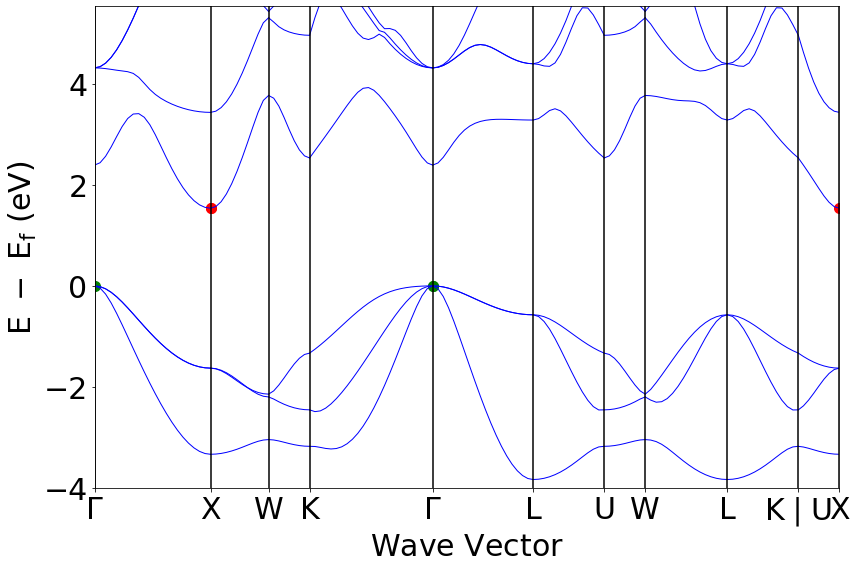

In [135]:
printmd('**Bande interdite**')
bande_interdite = bands.get_band_gap()
print(bande_interdite)
gap_energie = bande_interdite["energy"]
print(gap_energie)
print('On observe que la bande interdite est indirecte, et possede une energie de 1.5391 eV.Le maximum de la bande de valence apparaît pour un vecteur d onde d indice Gamma et le minimum de la bande de conduction apparaît pour un vecteur d onde d indice X.')

plotter = BSPlotter(bands)
plotter.get_plot(vbm_cbm_marker = True)

In [136]:
printmd('**DISPERSION DANS LES BANDES DE VALENCE ET DE CONDUCTION**')
print('Maintenant, on va trouver les directions dans laquelle la dernière (première) bande de valence (conduction)')
print('présente le plus et le moins de dispersion.')
print('')
print('Tout d abord, on va calculer le nombre de bandes total:')
print(bands.nb_bands) 
print('')

#information sur le maximum de la bande de valence
print('vbm')
print(bands.get_vbm())
print('On voit que la dernière bande de valence est la 7ème')
print('')

#information sur le minimum de la bande de conduction
print('cbm')
print(bands.get_cbm())
print('On voit que la première bande de conduction est la 8ème')
print('')

#Energie maximum de la bande de valence
print('Maximum de la bande de valence =',bands.bands[Spin.up][7][0])  
print('')

#Energie minimum de la bande de conduction
print('Minimum de la bande de conduction =',bands.bands[Spin.up][8][21])  
print('')

**DISPERSION DANS LES BANDES DE VALENCE ET DE CONDUCTION**

Maintenant, on va trouver les directions dans laquelle la dernière (première) bande de valence (conduction)
présente le plus et le moins de dispersion.

Tout d abord, on va calculer le nombre de bandes total:
22

vbm
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [5, 6, 7]}), 'kpoint_index': [0, 66, 67], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f472a625e48>, 'energy': 2.6936, 'projections': {}}
On voit que la dernière bande de valence est la 7ème

cbm
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [8]}), 'kpoint_index': [21, 22, 148], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f472d454278>, 'energy': 4.2327, 'projections': {}}
On voit que la première bande de conduction est la 8ème

Maximum de la bande de valence = 2.6936

Minimum de la bande de conduction = 4.2327



In [137]:
#Maximum et minimum de dispersion dans la bande de valence 
printmd('**Maximum et minimum de dispersion dans la bande de valence**')
print('Pour trouver le maximum et le minimum de dispersion pour la bande de valence, on va calculer la pente')
print('de la bande de valence dans chaque branche (on cherche la variation de l energie en fonction de la distance)')
print("")
pente = np.zeros(9)
for i in range (0,9):
    absic = distances[i]
    maxy = max(Energies[i].get('1')[7])
    miny = min(Energies[i].get('1')[7])
    pente[i] = (maxy-miny)/(max(distances[i]) - min(distances[i]))
    
maxdisp = max(pente)
for i in range (0,len(pente)):
    if pente[i]==maxdisp:
        print('Le maximum de dispersion vaut:',maxdisp, '[eV/Angström]') 
        print('Le maximum de dispersion est situé dans la branche numéro',i,)
print("")
mindisp = min(pente)
for i in range (0,len(pente)):
    if pente[i]==mindisp:
        print('Le minimum de dispersion vaut:',mindisp, '[eV/Angström]') 
        print('Le minimum de dispersion est situé dans la branche numéro',i,)
      
        

**Maximum et minimum de dispersion dans la bande de valence**

Pour trouver le maximum et le minimum de dispersion pour la bande de valence, on va calculer la pente
de la bande de valence dans chaque branche (on cherche la variation de l energie en fonction de la distance)

Le maximum de dispersion vaut: 2.201053727527094 [eV/Angström]
Le maximum de dispersion est situé dans la branche numéro 6

Le minimum de dispersion vaut: 0.6335477907090108 [eV/Angström]
Le minimum de dispersion est situé dans la branche numéro 4


In [146]:
#Maximum et minimum de dispersion dans la bande de conduction
printmd('**Maximum et minimum de dispersion dans la bande de conduction**')
print('Pour trouver le maximum et le minimum de dispersion pour la bande de conduction, il faut réaliser le même processus')
print('que pour la bande de valence.')
print("")
pente2 = np.zeros(9)
for i in range (0,9):
    absic2 = distances[i]
    maxy2 = max(Energies[i].get('1')[8])
    miny2 = min(Energies[i].get('1')[8])
    pente2[i] = (maxy2-miny2)/(max(distances[i]) - min(distances[i]))

maxdisp2 = max(pente2)    
for i in range (0,len(pente2)):
    if pente2[i]==maxdisp2:
        print('Le maximum de dispersion vaut:',maxdisp2, '[eV/Angström]') 
        print('Le maximum de dispersion est situé dans la branche numéro',i,)
print("")
mindisp2 = min(pente2)
for j in range (0,len(pente2)):
    if pente2[j]==mindisp2:
         print('Le minimum de dispersion vaut:',mindisp2, '[eV/Angström]')
         print('Le minimum de dispersion est situé dans la branche numéro',j,)   
        

**Maximum et minimum de dispersion dans la bande de conduction**

Pour trouver le maximum et le minimum de dispersion pour la bande de conduction, il faut réaliser le même processus
que pour la bande de valence.

Le maximum de dispersion vaut: 4.279614153870988 [eV/Angström]
Le maximum de dispersion est situé dans la branche numéro 1

Le minimum de dispersion vaut: 0.6594765382710053 [eV/Angström]
Le minimum de dispersion est situé dans la branche numéro 7


**Graphe montrant les maxima de la bande de valence, le minimum de la bande de conduction et les directions dans lesquelles les bandes de valence et de conduction présentent des dispersions maximales ou minimales.**

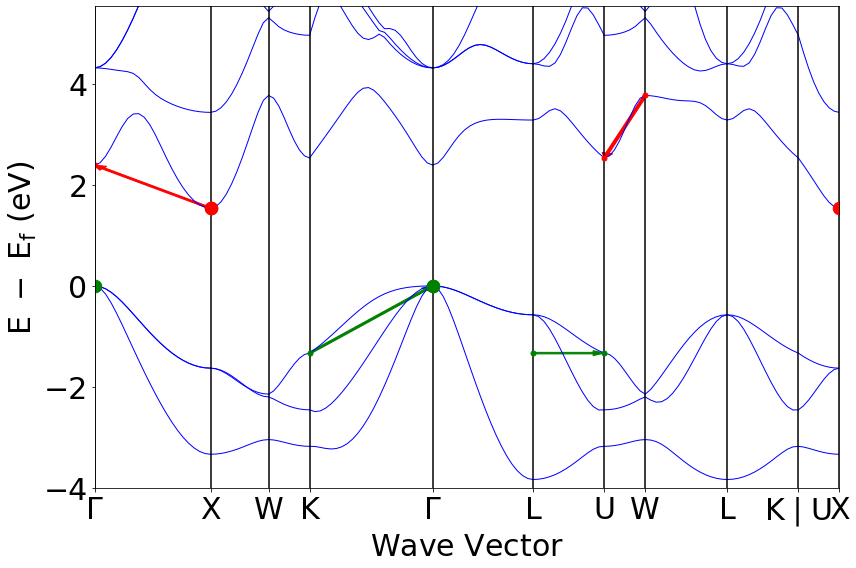

In [150]:
printmd("**Graphe montrant les maxima de la bande de valence, le minimum de la bande de conduction et les directions dans lesquelles les bandes de valence et de conduction présentent des dispersions maximales ou minimales.**")
a.get_plot()
#On place les maxima de la bande de valence sur le graphe (points verts)
vbm2 = b.get('vbm')
for i in range (0,len(vbm2)):
    (x,y) = vbm2[i]
    plt.plot(x,y,'.g',markersize=25)

#On place les minima de la bande de conduction sur le graphe (points rouges)
cbm2 = b.get('cbm')
for i in range(len(cbm2)):
    (x,y) = cbm2[i]
    plt.plot(x,y,'.r',markersize=25)

x1 = distances[3][0]
x2 = distances[3][len(distances[3])-1]
y1 = Energies[3].get('1')[7][0]
y2 = Energies[3].get('1')[7][len(Energies[3].get('1')[7])-1]
plt.plot(x1,y1,'.g',markersize=10)
plt.plot(x2,y2,'.g',markersize=10)
plt.arrow(x1,y1,x2-x1,y2-y1,width = 0.03,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green')

c1 = distances[5][0]
c2 = distances[5][len(distances[5])-1]
d1 = min(Energies[5].get('1')[7])
d2 = Energies[5].get('1')[7][len(Energies[5].get('1')[7])-1]
plt.plot(c1,d1,'.g',markersize=10)
plt.plot(c2,d2,'.g',markersize=10)
plt.arrow(c1,d1,c2-c1,d2-d1,width = 0.03,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green')

a1 = distances[0][0]
a2 = distances[0][len(distances[0])-1]
b1 = Energies[0].get('1')[8][0]
b2 = Energies[0].get('1')[8][len(Energies[0].get('1')[8])-1]
plt.plot(a1,b1,'.r',markersize=10)
plt.plot(a2,b2,'.r',markersize=10)
plt.arrow(a2,b2,a1-a2,b1-b2,width = 0.03,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red')

v1 = distances[6][0]
v2 = distances[6][len(distances[6])-1]
w1 = Energies[6].get('1')[8][0]
w2 = Energies[6].get('1')[8][len(Energies[6].get('1')[8])-1]
plt.plot(v1,w1,'.r',markersize=10)
plt.plot(v2,w2,'.r',markersize=10)
plt.arrow(v2,w2,v1-v2,w1-w2,width = 0.03,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red')

